<a href="https://colab.research.google.com/github/mbl-cin/Sistemas_inteligentes/blob/main/KMeans_com_scikit_learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ucimlrepo
!pip install pyclustering
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn import metrics

In [ ]:
from ucimlrepo import fetch_ucirepo

# Dando fetch no dataset
estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition = fetch_ucirepo(id=544)

# Pegando os dados e escolhendo as colunas
X = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.features.drop(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS'], axis=1)
y = estimation_of_obesity_levels_based_on_eating_habits_and_physical_condition.data.targets

print(X)
print(y)

            Age    Height      Weight  FCVC  NCP      CH2O       FAF       TUE
0     21.000000  1.620000   64.000000   2.0  3.0  2.000000  0.000000  1.000000
1     21.000000  1.520000   56.000000   3.0  3.0  3.000000  3.000000  0.000000
2     23.000000  1.800000   77.000000   2.0  3.0  2.000000  2.000000  1.000000
3     27.000000  1.800000   87.000000   3.0  3.0  2.000000  2.000000  0.000000
4     22.000000  1.780000   89.800000   2.0  1.0  2.000000  0.000000  0.000000
...         ...       ...         ...   ...  ...       ...       ...       ...
2106  20.976842  1.710730  131.408528   3.0  3.0  1.728139  1.676269  0.906247
2107  21.982942  1.748584  133.742943   3.0  3.0  2.005130  1.341390  0.599270
2108  22.524036  1.752206  133.689352   3.0  3.0  2.054193  1.414209  0.646288
2109  24.361936  1.739450  133.346641   3.0  3.0  2.852339  1.139107  0.586035
2110  23.664709  1.738836  133.472641   3.0  3.0  2.863513  1.026452  0.714137

[2111 rows x 8 columns]
               NObeyesdad
0

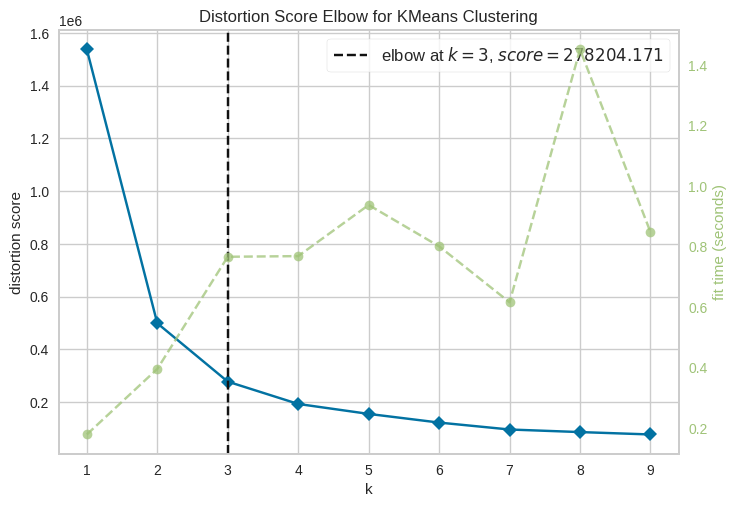

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Aplicando o método Elbow para visualizar o melhor número de clusters
model = KMeans(n_init=10)
visualizer = KElbowVisualizer(model, k=(1,10))

visualizer.fit(X)
visualizer.poof()

In [ ]:
# Executando o KMeans com K = 3 (melhor Elbow Score)
kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.fit_predict(X)

kmeans.cluster_centers_

array([[ 26.23433015,   1.7071317 ,  83.7929037 ,   2.26402924,
          2.53612121,   2.00012996,   1.07755958,   0.63907634],
       [ 20.92174669,   1.65105148,  56.78896399,   2.35712253,
          2.6845546 ,   1.89878779,   1.1067993 ,   0.75367179],
       [ 25.41816272,   1.74280132, 117.15065406,   2.64063189,
          2.84501098,   2.11755124,   0.84963617,   0.5890124 ]])

In [ ]:
# Calculando o coeficiente de Silhouette
silhouette_avg = metrics.silhouette_score(X, cluster_labels)
print ('silhouette coefficient for the above clustering = ', silhouette_avg)

silhouette coefficient for the above clustering =  0.5064581914150884


In [ ]:
# Calculando o grau de pureza da clusterização
def purity_score(y_true, y_pred):
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

purity = purity_score(y, cluster_labels)
print ('Purity for the above clustering = ', purity)

Purity for the above clustering =  0.40360018948365706


In [ ]:
# Executando o KMeans apenas duas dimensões (para visualização)
X = X[['Weight', 'Height']]

kmeans = KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
cluster_labels = kmeans.fit_predict(X)

kmeans.cluster_centers_

array([[ 55.34465355,   1.65076826],
       [116.58544617,   1.7414553 ],
       [ 82.15931893,   1.70289088]])

In [ ]:
# Calculando o coeficiente de Silhouette e pureza
silhouette_avg = metrics.silhouette_score(X, cluster_labels)
print ('silhouette coefficient for the above clustering = ', silhouette_avg)

purity = purity_score(y, cluster_labels)
print ('Purity for the above clustering = ', purity)

silhouette coefficient for the above clustering =  0.5966711689998256
Purity for the above clustering =  0.4050213169114164


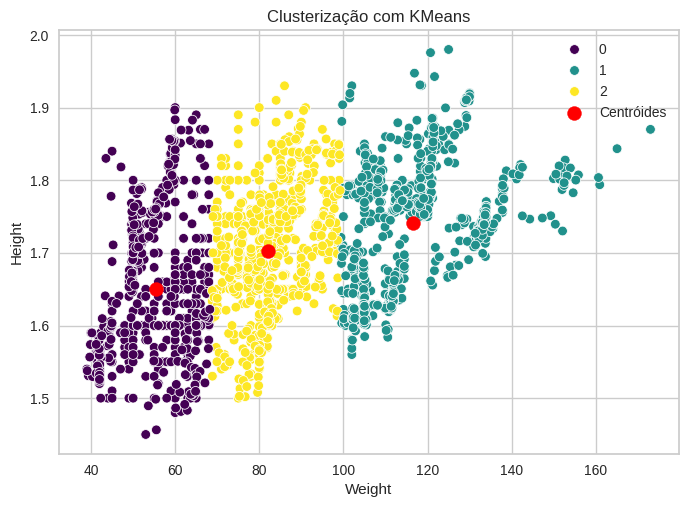

In [ ]:
# Vamos adicionar os rótulos dos clusters ao dataframe
X['Cluster'] = cluster_labels

# Plotar o gráfico de dispersão com seaborn
sns.scatterplot(data=X, x='Weight', y='Height', hue='Cluster', palette='viridis', legend='full')

# Plotar os centróides dos clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centróides')
plt.legend()
plt.title('Clusterização com KMeans')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()